In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import pickle
import os
from rdflib import Graph
import rdflib as rdf
import os
from scipy import sparse
import matplotlib.colors as mcolors
import re
from collections import defaultdict
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
def read_all_pickle_without_ending(path):
    """
    Read all pickle files in a directory and return a list of the dataframes.
    """
    files = os.listdir(path)
    files = [file for file in files if file.endswith(".pkl")]
    files.sort()
    dfs = []
    for file in files:
        dfs.append(pd.read_pickle(path + file))
    return dfs

def readallcsvinpath(path):
    """
    Read all csv files in a directory and return a list of the dataframes.
    """
    fil = os.listdir(path)
    fil = [file for file in fil if file.endswith(".csv")]
    fil.sort()
    dfs = []
    for file in fil:
        dfs.append(pd.read_csv(path + file))
    return dfs
def get_nameincolfor_index(df,id_list):
    """
    # df: dataframe
    # id_list: list of ids
    # return: list of names of ids
    """
    name_list=[]
    for i in id_list:
        name_list.append(df[df.index==i][0].values[0])
    return name_list
def cut_string(list):
    for i in range(len(list)):
        list[i] = list[i].split('mov')[1]
    return list
def parse_tensor_string(tensor_str):
    values_str = re.search(r'\[(.*?)\]', tensor_str).group(1)
    values = [float(val) for val in values_str.split(', ')]
    return torch.tensor(values)

In [3]:
files = read_all_pickle_without_ending('out/AIFB/RGCN_no_emb/')
csv = readallcsvinpath('out/AIFB/RGCN_no_emb/')
pred_before = torch.load('out/AIFB/RGCN_no_emb/pred_before.pt').to_dense().detach().numpy()
test_file = pd.read_csv('data/AIFB/testSet.tsv', sep=',')


In [4]:
path = 'out/AIFB/RGCN_no_emb/'
fil = os.listdir(path)
fil = [file for file in fil if file.endswith(".pt")]
fil.sort()
dfs = []
for file in fil:
    dfs.append(torch.load(path + file).to_dense().detach().numpy())

In [92]:

diff = {}
# predicted_class_indices = np.argmax(predicted_values, axis=1)

# # Create a new array containing only the predicted class and its value
# predicted_class_and_value = np.array([(predicted_class_indices[i], predicted_values[i, predicted_class_indices[i]])
#                                       for i in range(len(predicted_class_indices))])
for i in range(len(dfs)):
    minus = (dfs[i] - pred_before)
    if minus.sum() != 0:
        diff[i] = minus
diff[5]
pred_before[np-arange(pred_before.shape[0]), pred_before.argmax(axis=1)]
dfs[5][np.arange(dfs[5].shape[0]), dfs[5].argmax(axis=1)]

array([0.5027371 , 0.837173  , 0.74963266, ..., 0.9160623 , 0.51667255,
       0.6545795 ], dtype=float32)

In [25]:
diff

{0: array([[ 0.0053556 , -0.00704432, -0.00524724, -0.00733709],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.00294489, -0.00948465, -0.00768352, -0.00977862],
        ...,
        [ 0.01018441, -0.0021553 , -0.00036728, -0.00244689],
        [ 0.00539398, -0.00700557, -0.00520837, -0.00729811],
        [ 0.        ,  0.        ,  0.        ,  0.        ]],
       dtype=float32),
 1: array([[ 0.0119614 , -0.01576889, -0.01170719, -0.01640999],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.00660026, -0.02128005, -0.01719654, -0.02192521],
        ...,
        [ 0.02260083, -0.00483084, -0.00081325, -0.00546527],
        [ 0.01204664, -0.01568139, -0.01162004, -0.01632214],
        [ 0.        ,  0.        ,  0.        ,  0.        ]],
       dtype=float32),
 2: array([[ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.00035411, -0.00194907, -0.00161648, -0.00201249],
        [ 0.        ,  0.        ,  0.        ,  

## Pred Änderung RGCN no emb before/after

#### Relevance that prediction changes, if relevance is changed

In [71]:
classes_before = pred_before.argmax(axis=1)
count_changed,total_pred = 0,0
for i in range(len(dfs)):
    classes = dfs[i].argmax(axis=1)
    changed_pred = np.sum([classes != classes_before])
    count_changed += changed_pred
    total_pred += len(classes)
    print(changed_pred)
print(len(dfs), total_pred, count_changed)
score = count_changed / total_pred
score
dfs[5]

0
0
1
0
0
13
0
0
0
0
0
3
0
13 36855 17


array([[0.5027371 , 0.07828134, 0.35740626, 0.06157539],
       [0.837173  , 0.04988027, 0.07077749, 0.04216927],
       [0.74963266, 0.07831838, 0.10383847, 0.06821045],
       ...,
       [0.0423599 , 0.02336098, 0.9160623 , 0.01821681],
       [0.51667255, 0.07830931, 0.34336224, 0.06165587],
       [0.6545795 , 0.10997754, 0.13805743, 0.09738549]], dtype=float32)

ValueError: The number of FixedLocator locations (2835), usually from a call to set_ticks, does not match the number of labels (1127).

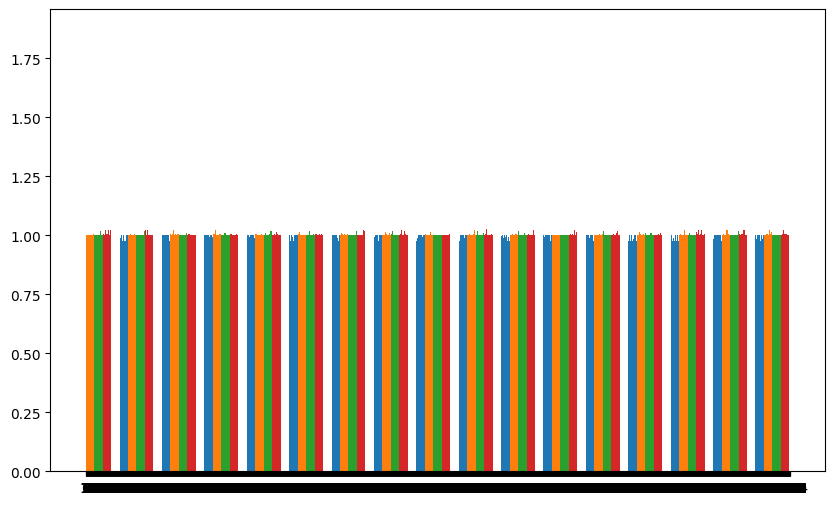

In [273]:
prediction_changes = t_441356
# Filter nodes with non-zero prediction changes
non_zero_changes = np.any(prediction_changes != 0, axis=1)
filtered_changes = prediction_changes[non_zero_changes]

# Get the indices of nodes with non-zero changes
non_zero_indices = np.where(non_zero_changes)[0]

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate the width of each bar group
bar_width = 0.2  # Adjust this value as needed

# Plot the non-zero changes for each category
for category in range(4):
    x_positions = non_zero_indices + bar_width * category
    ax.bar(x_positions, filtered_changes[:, category], width=bar_width, label=f'Category {category}')

# Set custom x-axis ticks and labels
x_ticks = non_zero_indices + bar_width * 1.5  # Place the ticks in the middle of each bar group
x_labels = ['Node {}'.format(idx) for idx in non_zero_indices]  # Custom labels for each node

ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, rotation=45, ha="right")  # Rotate the labels for better readability

ax.set_xlabel('Nodes')
ax.set_ylabel('Change in Prediction')
ax.set_title('Bar Plot of Prediction Changes for Nodes with Non-Zero Changes')
ax.legend()

plt.tight_layout()
plt.show()

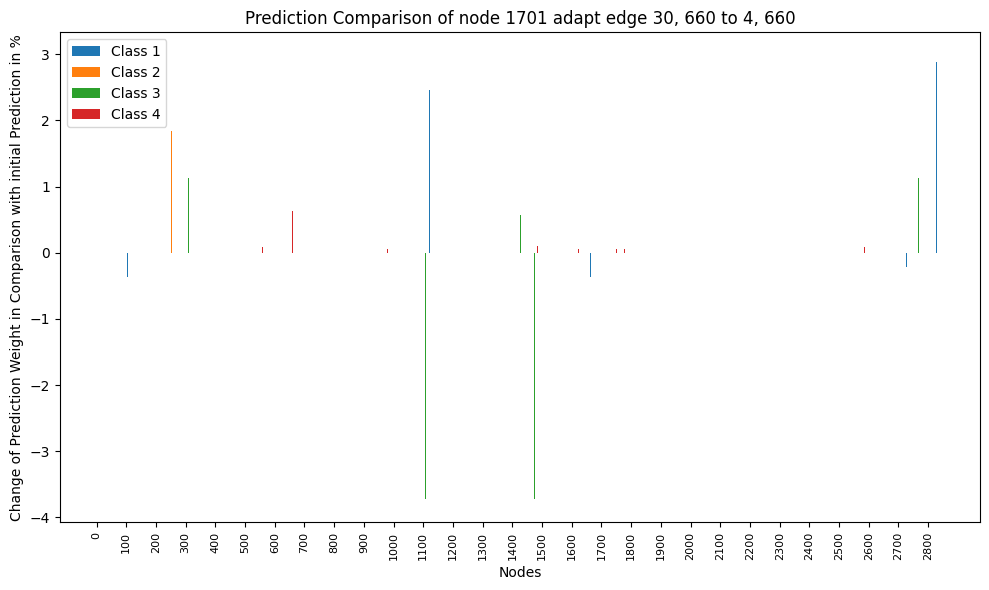

In [70]:
prediction_weights = diff[11]

# Find non-zero indices and values
non_zero_indices = np.where(prediction_weights != 0)
non_zero_values = prediction_weights[non_zero_indices]
# Create a bar plot
plt.figure(figsize=(10, 6))

class_labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4']

for class_idx in range(4):
    class_values =( non_zero_values[non_zero_indices[1] == class_idx])*100
    class_indices = non_zero_indices[0][non_zero_indices[1] == class_idx]
    plt.bar(class_indices + class_idx * 0.2, class_values, width=0.2, align='center', label=class_labels[class_idx])

plt.xlabel('Nodes')
plt.ylabel('Change of Prediction Weight in Comparison with initial Prediction in %')
plt.title('Prediction Comparison of node 1701 adapt edge 30, 660 to 4, 660')
plt.xticks(np.arange(0, class_indices.max(), step=100), rotation='vertical', fontsize=8)
plt.legend()
plt.tight_layout()
plt.show()

ValueError: [(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)] is not a valid value for color

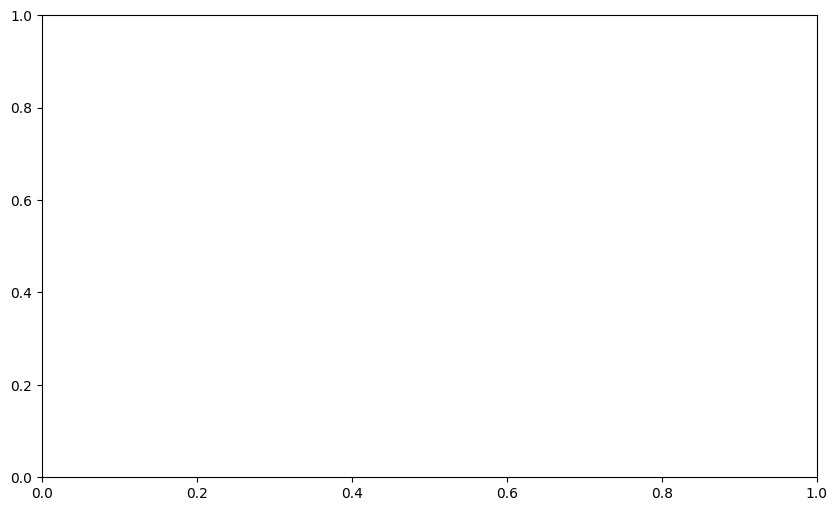

In [105]:
# Define colors for each class
prediction_values=dfs[5][np.arange(dfs[5].shape[0]), dfs[5].argmax(axis=1)]
class_indices =  dfs[5].argmax(axis=1)

# Create a colormap with 4 distinct colors
cmap = plt.get_cmap('tab10', 4)

# Create an array of colors based on class indices
colors = [mcolors.to_rgba(cmap(idx)) for idx in class_indices]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(prediction_values, color=colors)

# Set x-axis label
plt.xlabel('Node Index')

# Set y-axis label
plt.ylabel('Prediction Value')

# Show the plot
plt.show()

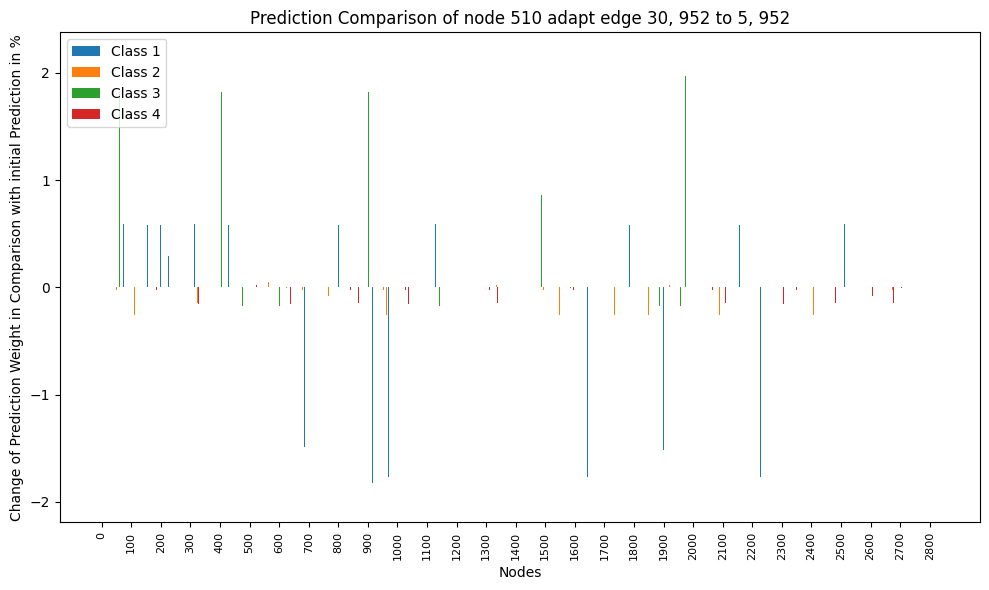

In [74]:
prediction_weights = diff[5]

# Find non-zero indices and values
non_zero_indices = np.where(prediction_weights != 0)
non_zero_values = prediction_weights[non_zero_indices]
# Create a bar plot
plt.figure(figsize=(10, 6))

class_labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4']

for class_idx in range(4):
    class_values =( non_zero_values[non_zero_indices[1] == class_idx])*100
    class_indices = non_zero_indices[0][non_zero_indices[1] == class_idx]
    plt.bar(class_indices + class_idx * 0.2, class_values, width=0.2, align='center', label=class_labels[class_idx])

plt.xlabel('Nodes')
plt.ylabel('Change of Prediction Weight in Comparison with initial Prediction in %')
plt.title('Prediction Comparison of node 510 adapt edge 30, 952 to 5, 952')
plt.xticks(np.arange(0, class_indices.max(), step=100), rotation='vertical', fontsize=8)
plt.legend()
plt.tight_layout()
plt.show()

#### Prediction changed from working group 0 to working group 2.

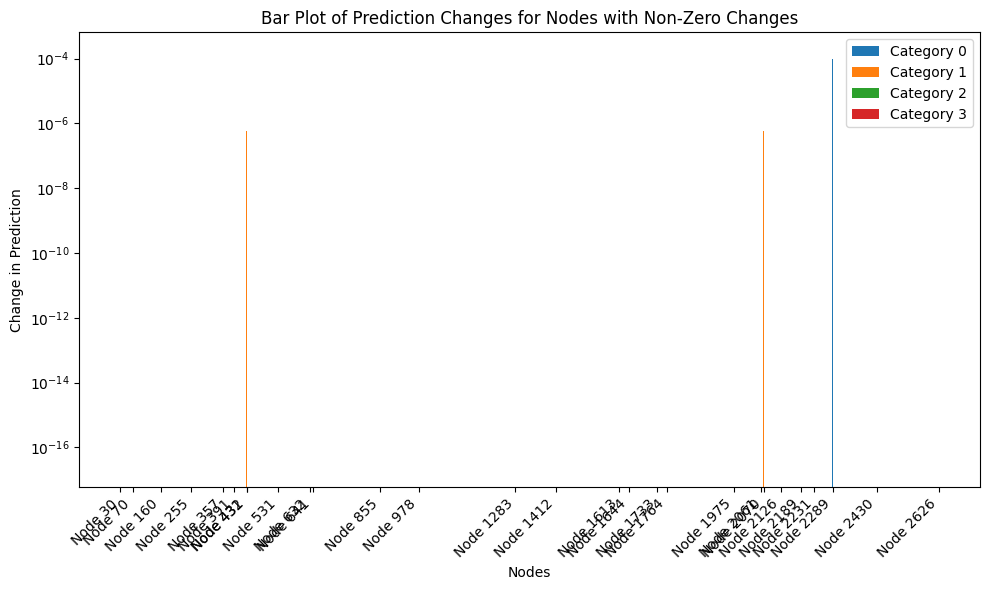

In [136]:
prediction_changes = t_2541
# Filter nodes with non-zero prediction changes
# Filter nodes with non-zero prediction changes
non_zero_changes = np.any(prediction_changes != 0, axis=1)
filtered_changes = prediction_changes[non_zero_changes]

# Get the indices of nodes with non-zero changes
non_zero_indices = np.where(non_zero_changes)[0]

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate the width of each bar group
bar_width = 0.2  # Adjust this value as needed

# Plot the non-zero changes for each category
for category in range(4):
    x_positions = non_zero_indices + bar_width * category
    ax.bar(x_positions, filtered_changes[:, category], width=bar_width, label=f'Category {category}')

# Set custom x-axis ticks and labels
x_ticks = non_zero_indices + bar_width * 1.5  # Place the ticks in the middle of each bar group
x_labels = ['Node {}'.format(idx) for idx in non_zero_indices]  # Custom labels for each node

ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, rotation=45, ha="right")  # Rotate the labels for better readability

ax.set_yscale('log')  # Set logarithmic scale on y-axis
ax.set_xlabel('Nodes')
ax.set_ylabel('Change in Prediction')
ax.set_title('Bar Plot of Prediction Changes for Nodes with Non-Zero Changes')
ax.legend()

plt.tight_layout()
plt.show()

In [133]:
t_1733[2541]

array([-0.9788795 ,  0.22135384,  0.67665106,  0.08087461], dtype=float32)

In [59]:
edge_index_plus = files[0]
edge_type_plus = files[1]
edges_list = files[2]
i2n = files[3]
i2r = files[4]
triples_plus = files[5]
i2n[2541]
i2n[1008]

'http://swrc.ontoware.org/ontology#Person'

In [48]:
large_after_nodes = csv[0]
large_after_edges = csv[1]
edges = csv[2]
nodes = csv[3]
small_after_nodes = csv[4]
small_after_edges = csv[5]

In [76]:
pred_before = torch.load('out/AIFB/RGAT_no_emb/pred_before.pt')
filename = [file for file in os.listdir('out/AIFB/RGAT_no_emb/') if file.endswith(".pt")]
name_list = []
for i in range((len(filename)-1)):
    first = filename[i].split('(')[2].split(',')[0]
    try:
        second = filename[i].split('adapt_tensor([ ')[1].split(']')[0].replace(' ','').replace(',','__')
    except:
        second = filename[i].split('adapt_')[1].split('.')[0]
    name_list.append('pred_after'+first+'_'+second)

pred_after2486_19__1025 = torch.load('out/AIFB/RGAT_no_emb/pred_after(17, tensor(2486, device=\'cuda7\'))adapt_tensor([  19, 1025])_5.pt')
pred_after2486_19__2486 = torch.load('out/AIFB/RGAT_no_emb/pred_after(17, tensor(2486, device=\'cuda7\'))adapt_tensor([  19, 2486])_4.pt')
pred_after2498_1__1485 = torch.load('out/AIFB/RGAT_no_emb/pred_after(21, tensor(2498, device=\'cuda7\'))adapt_tensor([   1, 1485])_2.pt')
pred_after2498_7__1485 = torch.load('out/AIFB/RGAT_no_emb/pred_after(21, tensor(2498, device=\'cuda7\'))adapt_tensor([   7, 1485])_21.pt')
pred_after2030_2113_22 = torch.load('out/AIFB/RGAT_no_emb/pred_after(22, tensor(2030, device=\'cuda7\'))adapt_2113_22.pt')
pred_after2030_2653_5 = torch.load('out/AIFB/RGAT_no_emb/pred_after(22, tensor(2030, device=\'cuda7\'))adapt_2653_5.pt')
pred_after2030_3__2113 = torch.load('out/AIFB/RGAT_no_emb/pred_after(22, tensor(2030, device=\'cuda7\'))adapt_tensor([   3, 2113])_22.pt')
pred_after2030_12__2113= torch.load('out/AIFB/RGAT_no_emb/pred_after(22, tensor(2030, device=\'cuda7\'))adapt_tensor([  12, 2113])_3.pt')
pred_after2583_1485_3 = torch.load('out/AIFB/RGAT_no_emb/pred_after(3, tensor(2583, device=\'cuda7\'))adapt_1485_3.pt')
pred_after2583_2583_22 = torch.load('out/AIFB/RGAT_no_emb/pred_after(3, tensor(2583, device=\'cuda7\'))adapt_2583_22.pt')
pred_after2657_1151_12 = torch.load('out/AIFB/RGAT_no_emb/pred_after(34, tensor(2657, device=\'cuda7\'))adapt_1151_12.pt')
pred_after2657_1276_19 = torch.load('out/AIFB/RGAT_no_emb/pred_after(34, tensor(2657, device=\'cuda7\'))adapt_1276_19.pt')

pred_after_list = [pred_after2486_19__1025,pred_after2486_19__2486,pred_after2498_1__1485,pred_after2498_7__1485,pred_after2030_2113_22,pred_after2030_2653_5,pred_after2030_3__2113,pred_after2030_12__2113,pred_after2583_1485_3,pred_after2583_2583_22,pred_after2657_1151_12,pred_after2657_1276_19]

In [78]:
nodes

,Unnamed: 0,Unnamed: 1,rel_nodes_new,rel_edges_new,max_nodes_new,pos_max_nodes_new,min_nodes_new,pos_min_nodes_new,max_edges_new,pos_max_edges_new,min_edges_new,pos_min_edges_new
0,22,"tensor(2030, device='cuda:7')","tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, ....","tensor([[ 0.0000e+00, 0.0000e+00, 0.0000e+00...",12.116058,2113,-13.741415,2653,283.724609,"tensor([[ 3, 2113]])",-305.332916,"tensor([[ 12, 2113]])"
1,17,"tensor(2486, device='cuda:7')","tensor([0.0000e+00, 0.0000e+00, 3.8014e-06, ....","tensor([[ 0.0000e+00, 0.0000e+00, 1.5323e-05...",16.862610,2486,-15.271867,1485,310.629364,"tensor([[ 3, 2486]])",-336.856628,"tensor([[ 0, 2486]])"
2,21,"tensor(2498, device='cuda:7')","tensor([0., 0., 0., ..., 0., 0., 0.])","tensor([[0., 0., 0., ..., 0., 0., 0.],\r\n ...",225.307114,2498,-214.648071,1485,912.593323,"tensor([[ 0, 2498]])",-399.981750,"tensor([[ 1, 1485]])"


In [66]:
def lineplot_pred_before(tensor):
    plt.figure(figsize=(20,10))
    plt.plot(tensor.detach().cpu().numpy())
    plt.title('Prediction before Adaptation')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

# Auswertung Relevanzen
#### Average relevance nodes

In [21]:
path = 'out/AIFB/RGCN_no_emb/relevances/'
dist = 'out/AIFB/RGCN_emb/DistMult/relevances/'
transe = 'out/AIFB/RGCN_emb/TransE/relevances/'
transh = 'out/AIFB/RGCN_emb/TransH/relevances/'
list_paths = [path,dist,transe,transh]
fil = os.listdir(path)
dist2 = os.listdir(dist)
transe2 = os.listdir(transe)
transh2 = os.listdir(transh)
rel_before = [file for file in fil if file.startswith("relevances_node_")]
rel_bef_dist = [file for file in dist2 if file.startswith("relevances_node_")]
rel_bef_transe = [file for file in transe2 if file.startswith("relevances_node_")]
rel_bef_transh = [file for file in transh2 if file.startswith("relevances_node_")]
count_path= 0
for l in [rel_before,rel_bef_dist,rel_bef_transe,rel_bef_transh]:
    path2 = list_paths[count_path]
    count_path += 1
    print('######',path2,'######')
    mean_rel_ges = 0 
    count_zero_ges = 0
    count_positive_ges = 0
    count_negative_ges = 0 
    mean_positive = 0
    mean_negative = 0
    count = 0
    #print(path2)
    for rel in l:
        rb = torch.load(path2 + rel)
        #print(path2, rel)
        #print(rb.sum())
        rb_non_zero = rb[rb != 0]
        rb_count_zero = rb[rb == 0]
        mean_rel= rb_non_zero.mean(axis=0)
        rb_count_positive = rb[rb > 0]
        rb_count_negative = rb[rb < 0]
        mean_rel_ges += mean_rel
        #print(mean_rel)
        count_zero_ges += len(rb_count_zero)
        count_positive_ges += len(rb_count_positive)
        count_negative_ges += len(rb_count_negative)
        count += 1
        mean_positive += rb_count_positive.mean(axis=0)
        mean_negative += rb_count_negative.mean(axis=0)
    mean_positive_ges = mean_positive / count
    mean_negative_ges = mean_negative / count
    percentage_zero =   count_zero_ges / (len(rb)* len(l))
    percentage_positive = count_positive_ges / (len(rb)* len(l))
    percentage_negative = count_negative_ges / (len(rb)* len(l))
    mean_rel_ges = mean_rel_ges / count
    print('Average_relevance without zero: ',mean_rel_ges, '\n',
            'Proportion 0 relevance: ', percentage_zero, '\n',
            'Proportion positive relevance: ', percentage_positive, '\n',
            'Proportion negative relevance: ',percentage_negative, '\n',
            'Average positive relevance: ', mean_positive_ges, '\n',
            'Average negative relevance: ',mean_negative_ges)

###### out/AIFB/RGCN_no_emb/relevances/ ######
Average_relevance without zero:  tensor(0.0007, grad_fn=<DivBackward0>) 
 Proportion 0 relevance:  0.4652263374485597 
 Proportion positive relevance:  0.2706937095825985 
 Proportion negative relevance:  0.26407995296884185 
 Average positive relevance:  tensor(0.0026, grad_fn=<DivBackward0>) 
 Average negative relevance:  tensor(-0.0013, grad_fn=<DivBackward0>)
###### out/AIFB/RGCN_emb/DistMult/relevances/ ######
Average_relevance without zero:  tensor(0.0007, grad_fn=<DivBackward0>) 
 Proportion 0 relevance:  0.4652263374485597 
 Proportion positive relevance:  0.29507152655300806 
 Proportion negative relevance:  0.2397021359984323 
 Average positive relevance:  tensor(0.0054, grad_fn=<DivBackward0>) 
 Average negative relevance:  tensor(-0.0151, grad_fn=<DivBackward0>)
###### out/AIFB/RGCN_emb/TransE/relevances/ ######
Average_relevance without zero:  tensor(0.0007, grad_fn=<DivBackward0>) 
 Proportion 0 relevance:  0.4652263374485597

## Relevanzverteilung vor/nach Tausch Kante

relevances_after_node_node_1132adapt_1356_28.pt 1132 1356 relevances_node_1132.pt


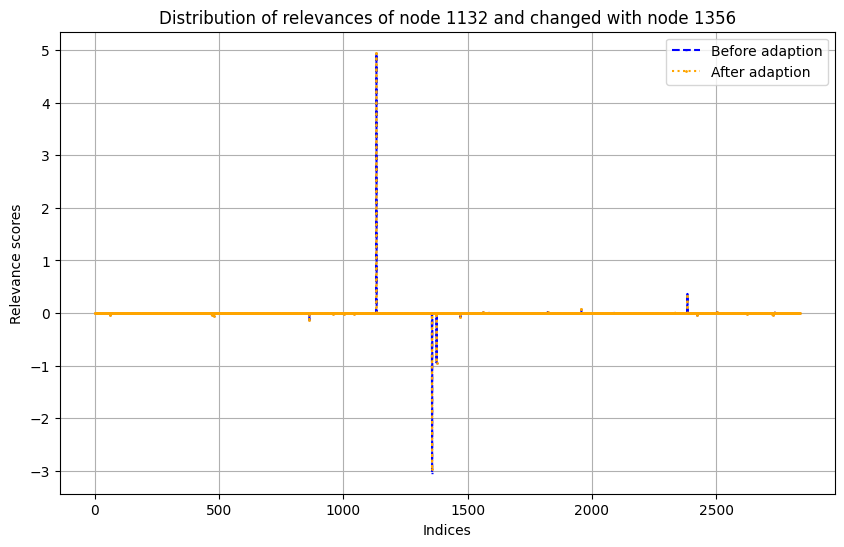

relevances_after_node_node_1701adapt_1610_44.pt 1701 1610 relevances_node_1701.pt


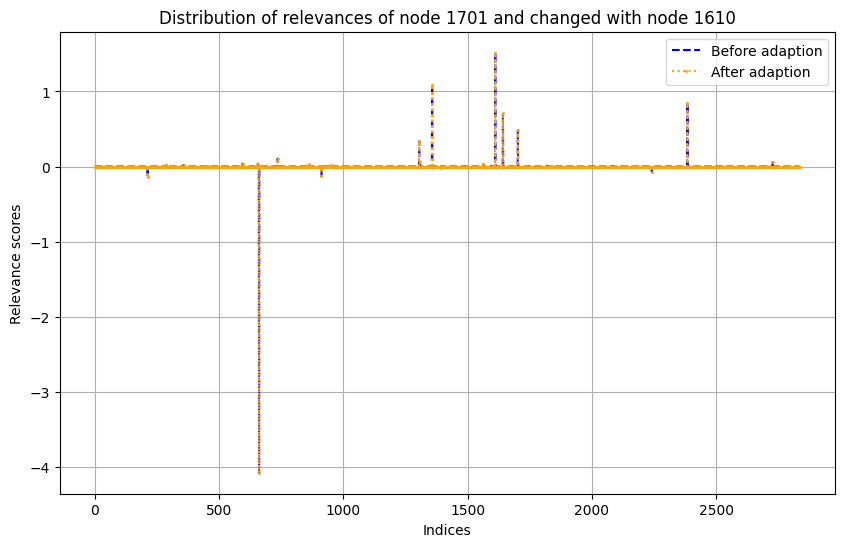

relevances_after_node_node_1701adapt_660_6.pt 1701 660 relevances_node_1701.pt


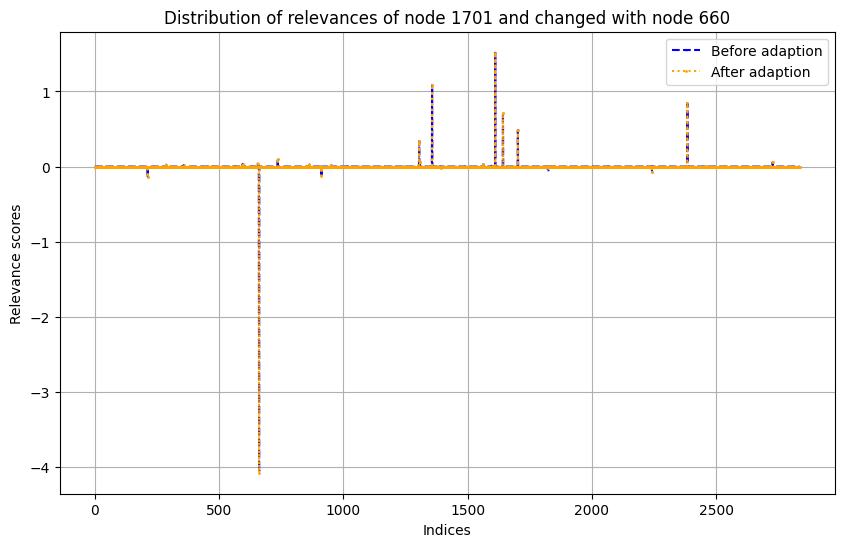

relevances_after_node_node_44adapt_1356_31.pt 44 1356 relevances_node_2444.pt


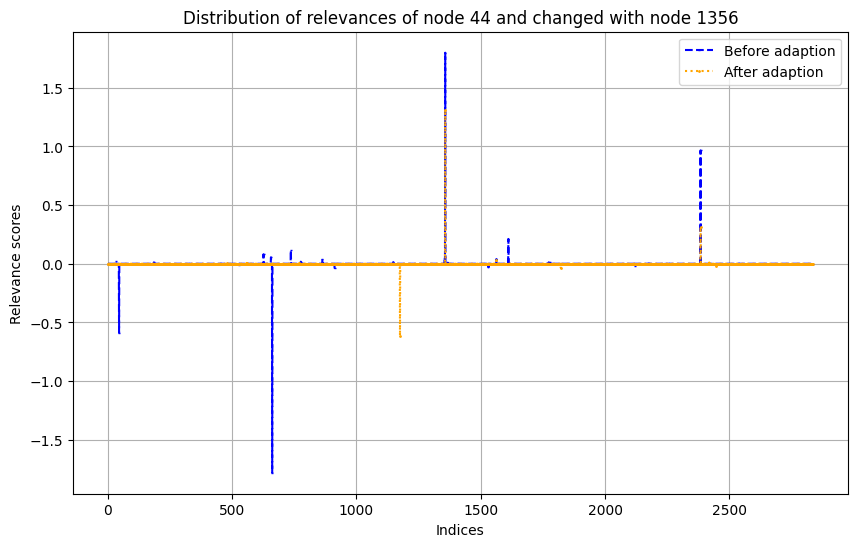

relevances_after_node_node_44adapt_1356_31.pt 44 1356 relevances_node_44.pt


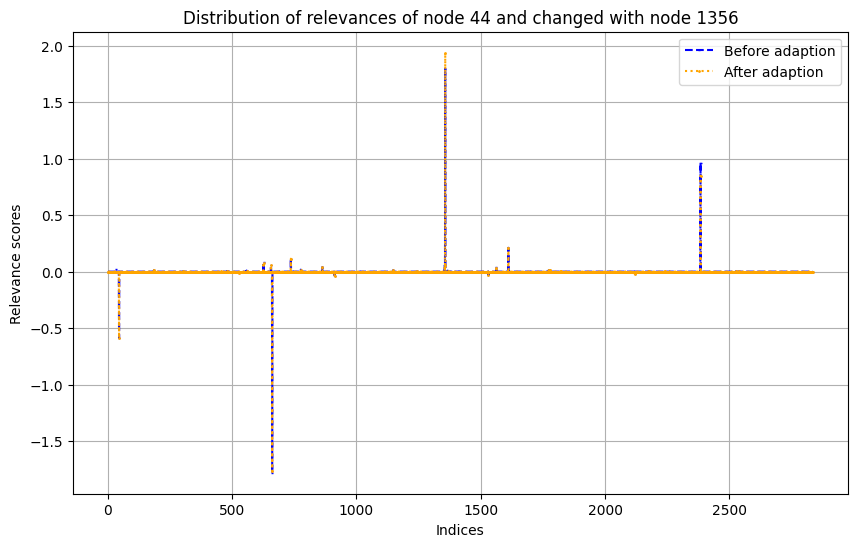

relevances_after_node_node_44adapt_660_4.pt 44 660 relevances_node_2444.pt


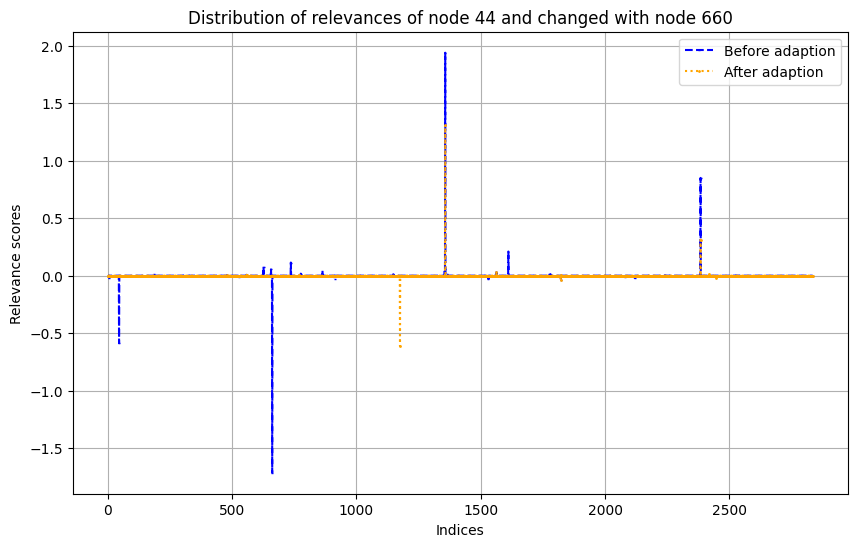

relevances_after_node_node_44adapt_660_4.pt 44 660 relevances_node_44.pt


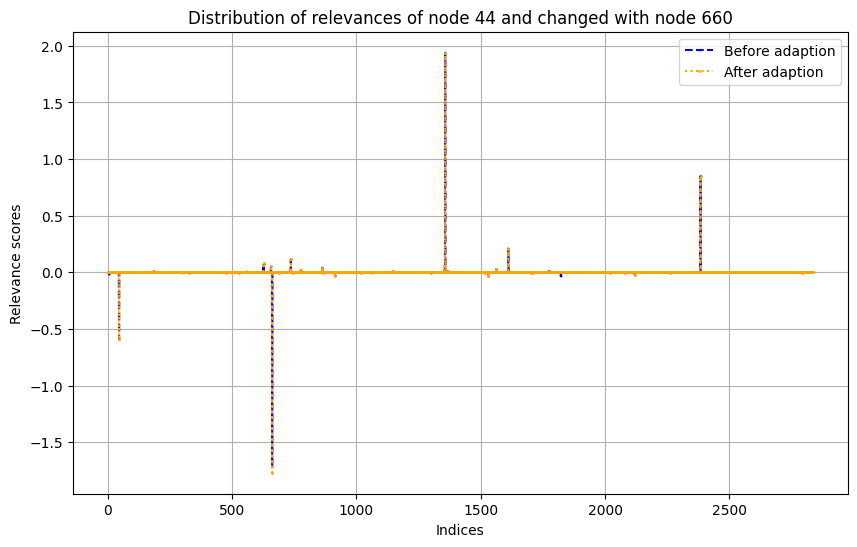

relevances_after_node_node_510adapt_1356_36.pt 510 1356 relevances_node_510.pt


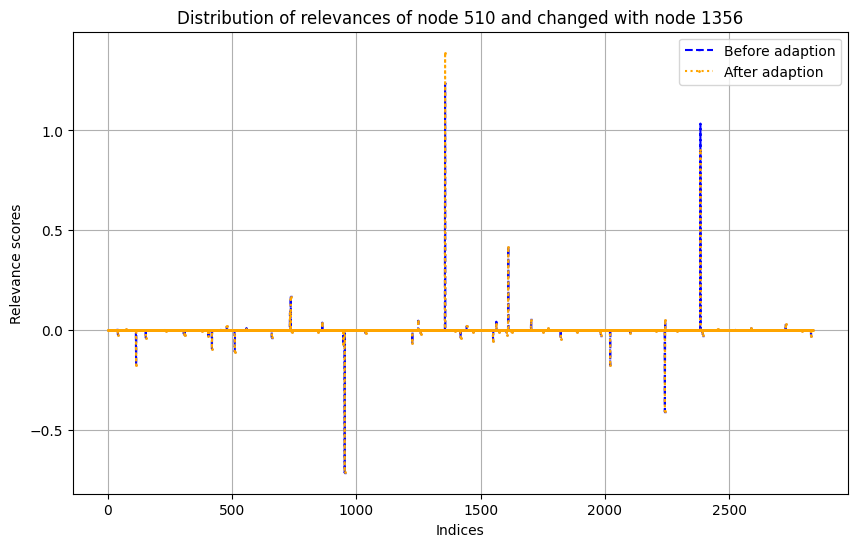

In [199]:
path = 'out/AIFB/RGCN_no_emb/relevances/'

fil = os.listdir(path)

rel_after = [file for file in fil if file.startswith("relevances_after_node_node_")]
rel_before = [file for file in fil if file.startswith("relevances_node_")]
dfs = []
for rel in rel_after:
    ra = torch.load(path+rel).to_dense().detach().numpy()
    node_name = rel.split('node_node_')[1].split('adapt')[0]
    adapt_node = rel.split('adapt_')[1].split('_')[0]
    for rel2 in rel_before:
        

        if node_name in rel2:
            print(rel, node_name, adapt_node, rel2)
            rb = torch.load(path+rel2).to_dense().detach().numpy()
            #ra = np.sort(ra)
            #rb = np.sort(rb)
            #Create an array of indices for the sorted data
            indices = np.arange(1, len(ra) + 1)

            # Create a line plot with different line styles and markers
            plt.figure(figsize=(10, 6))
            plt.plot(indices, ra, color='blue', linestyle='--', marker='_', markersize=2, label='Before adaption')
            plt.plot(indices, rb, color='orange', linestyle='dotted', marker='.', markersize=2, label='After adaption')

            plt.xlabel('Indices')
            plt.ylabel('Relevance scores')
            plt.title('Distribution of relevances of node {} and changed with node {}'.format(node_name,adapt_node))
            plt.legend()
            plt.grid(True)
            plt.show()



# RGAT

### Auswertung Relevanzen

In [22]:
path = 'out/AIFB/RGAT_no_emb/relevances/'
dist = 'out/AIFB/RGAT_emb/DistMult/relevances/'
transe = 'out/AIFB/RGAT_emb/TransE/relevances/'
transh = 'out/AIFB/RGAT_emb/TransH/relevances/'
list_paths = [path,dist,transe,transh]
fil = os.listdir(path)
dist2 = os.listdir(dist)
transe2 = os.listdir(transe)
transh2 = os.listdir(transh)
rel_before = [file for file in fil if file.startswith("relevances_node_")]
rel_bef_dist = [file for file in dist2 if file.startswith("relevances_node_")]
rel_bef_transe = [file for file in transe2 if file.startswith("relevances_node_")]
rel_bef_transh = [file for file in transh2 if file.startswith("relevances_node_")]
count_path= 0
for l in [rel_before,rel_bef_dist,rel_bef_transe,rel_bef_transh]:
    path2 = list_paths[count_path]
    count_path += 1
    print('######',path2,'######')
    mean_rel_ges = 0 
    count_zero_ges = 0
    count_positive_ges = 0
    count_negative_ges = 0 
    mean_positive = 0
    mean_negative = 0
    count = 0
    #print(path2)
    for rel in l:
        rb = torch.load(path2 + rel)
        #print(path2, rel)
        #print(rb.sum())
        rb_non_zero = rb[rb != 0]
        rb_count_zero = rb[rb == 0]
        mean_rel= rb_non_zero.mean(axis=0)
        rb_count_positive = rb[rb > 0]
        rb_count_negative = rb[rb < 0]
        mean_rel_ges += mean_rel
        #print(mean_rel)
        count_zero_ges += len(rb_count_zero)
        count_positive_ges += len(rb_count_positive)
        count_negative_ges += len(rb_count_negative)
        count += 1
        mean_positive += rb_count_positive.mean(axis=0)
        mean_negative += rb_count_negative.mean(axis=0)
    mean_positive_ges = mean_positive / count
    mean_negative_ges = mean_negative / count
    percentage_zero =   count_zero_ges / (len(rb)* len(l))
    percentage_positive = count_positive_ges / (len(rb)* len(l))
    percentage_negative = count_negative_ges / (len(rb)* len(l))
    mean_rel_ges = mean_rel_ges / count
    print('Average_relevance without zero: ',mean_rel_ges, '\n',
            'Proportion 0 relevance: ', percentage_zero, '\n',
            'Proportion positive relevance: ', percentage_positive, '\n',
            'Proportion negative relevance: ',percentage_negative, '\n',
            'Average positive relevance: ', mean_positive_ges, '\n',
            'Average negative relevance: ',mean_negative_ges)

###### out/AIFB/RGAT_no_emb/relevances/ ######
Average_relevance without zero:  tensor(0.0042) 
 Proportion 0 relevance:  0.8365667254556144 
 Proportion positive relevance:  0.08652753282382912 
 Proportion negative relevance:  0.07690574172055653 
 Average positive relevance:  tensor(0.1472) 
 Average negative relevance:  tensor(-0.1653)
###### out/AIFB/RGAT_emb/DistMult/relevances/ ######
Average_relevance without zero:  tensor(0.0042) 
 Proportion 0 relevance:  0.8365667254556144 
 Proportion positive relevance:  0.09569860866157162 
 Proportion negative relevance:  0.06773466588281403 
 Average positive relevance:  tensor(0.1607) 
 Average negative relevance:  tensor(-0.1775)
###### out/AIFB/RGAT_emb/TransE/relevances/ ######
Average_relevance without zero:  tensor(0.0042) 
 Proportion 0 relevance:  0.8365667254556144 
 Proportion positive relevance:  0.0847246717617088 
 Proportion negative relevance:  0.07870860278267686 
 Average positive relevance:  tensor(0.0793) 
 Average ne